In [2]:
import pickle
train = pickle.load(open("digits.pkl","rb"))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import numpy as np
import pandas as pd

# digits = datasets.load_digits()
digits=pd.read_csv('train.csv')
digits_target=digits['label']
del digits['label']
digits=digits.astype('float32')
digits[digits>0]=digits/255

n_samples = len(digits)

classifier = svm.SVC(gamma=0.025)

classifier.fit(digits[:n_samples], digits_target[:n_samples].values.ravel())


In [ ]:
import pickle
pickle.dump(classifier, open("digits.pkl", "wb"),protocol=pickle.HIGHEST_PROTOCOL)

Predicted:  [6]


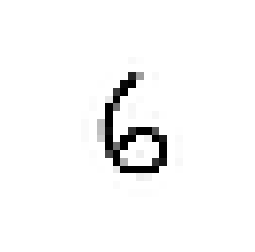

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import cv2
from PIL import Image
import numpy as np

def imageprepare(argv):
    """
    This function returns the pixel values.
    The input is a png file location.
    """
    im = Image.open(argv).convert("RGB")
    im = im.convert("L")

    width = float(im.size[0])
    height = float(im.size[1])
    new_image = Image.new('L', (28, 28), 255)  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if nheight == 0:  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        new_image.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Height becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if nwidth == 0:  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        new_image.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(new_image.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva


def remove_transparent(path):
    im = Image.open(path).convert("RGBA")
    width = float(im.size[0])
    height = float(im.size[1])
    canvas = Image.new('RGBA', im.size, (255, 255, 255, 255))  # Empty canvas colour (r,g,b,a)
    canvas.paste(im, mask=im)  # Paste the image onto the canvas, using it's alpha channel as mask
    canvas.thumbnail([width, height], Image.ANTIALIAS)
    canvas.save(path, format="PNG")

def convert_image(image_path):
    remove_transparent(image_path)
    x = [imageprepare(image_path)]  # file path here
    # Now we convert 784 sized 1d array to 24x24 sized 2d array so that we can visualize it
    new_arr = [[0 for d in range(28)] for y in range(28)]
    k = 0
    for i in range(28):
        for j in range(28):
            new_arr[i][j] = x[0][k]
            k = k + 1

    return new_arr

new_img=convert_image('C:/xampp/htdocs/digit_recog/tmp/img.png')
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(new_img, cmap=plt.cm.gray_r, interpolation='nearest')
npimg=np.array(new_img)
npimg[npimg>0.1]=1
npimg[npimg<=0.1]=0
npimg=npimg.reshape(-1,784)
predicted = train.predict(npimg)
print("Predicted: ",predicted)